In [48]:
import pypelines.supervised_pipeline as pipe
from pypelines import utils

### regression

In [49]:
utils.list_supported_models(model_type='regression')

['Elastic Net Regression',
 'Linear Regression',
 'Lasso Regression',
 'Ridge Regression',
 'SGD Regressor Regression',
 'Histogram Gradient Boost Regression',
 'Random Forest Regression',
 'AdaBoost Regression',
 'Poisson Regression',
 'Decision Tree Regression',
 'GBT Regression',
 'ExtraTree Regression',
 'GPR Regression',
 'Bayesian ARD Regression',
 'Bayesian Ridge Regression',
 'Quantile Regression',
 'Huber Regression',
 'TheilSen Regression',
 'Passive Aggressive Regression',
 'Gamma Regression',
 'Tweedie Regression',
 'OMP Regression',
 'LassoLars Regression',
 'RANSAC Regression']

In [ ]:
import pandas as pd
housing = pd.read_csv("pypelines/datasets/regression/housing.csv")

### regression - all models

In [ ]:
reg_pypelines_all = pipe.SupervisedPipeline(data = housing,target = 'median_house_value'
                            , model_type = 'regression'
                            , models = ['Elastic Net Regression',
                                        'Linear Regression',
                                        'Lasso Regression',
                                        'Ridge Regression',
                                        'SGD Regressor Regression',
                                        'Histogram Gradient Boost Regression',
                                        'Random Forest Regression',
                                        'AdaBoost Regression',
                                        'Poisson Regression',
                                        'Decision Tree Regression',
                                        'GBT Regression',
                                        'ExtraTree Regression',
                                        'GPR Regression',
                                        'Bayesian ARD Regression',
                                        'Bayesian Ridge Regression',
                                        'Quantile Regression',
                                        'Huber Regression',
                                        'TheilSen Regression',
                                        'Passive Aggressive Regression',
                                        'Gamma Regression',
                                        'Tweedie Regression',
                                        'OMP Regression',
                                        'LassoLars Regression',
                                        'RANSAC Regression']
                            , nfolds = 5)

In [ ]:
reg_pypelines_all.get_hyperparameters()

In [ ]:
reg_pypelines_all.model_list()

In [ ]:
reg_pypelines_all.get_code()

In [ ]:
reg_pypelines_all.code_to_clipboard()

In [41]:
reg_pypelines_all.code_to_file(path = "./code_output")

'model files saved to ./code_output'

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']
[]
Fitting 5 folds for each of 16 candidates, totalling 80 fits
                   model                    metric         value
0  extra_tree_regression                  r2_score  6.790670e-01
1  extra_tree_regression        mean_squared_error  4.205535e+09
2  extra_tree_regression  explained_variance_score  6.790705e-01


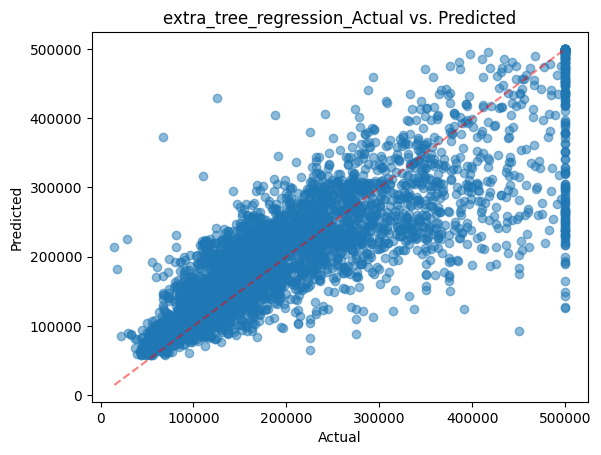

In [47]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# target dataframe: housing
target = "median_house_value"
features = list(housing.columns.drop("median_house_value"))
feature_df = housing[features]

# get numerical and categorical columns
bool_cols = feature_df.select_dtypes(include=['bool']).columns.tolist()
housing[bool_cols] = feature_df[bool_cols].astype(int)
numerical_cols = feature_df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = feature_df.select_dtypes(include=['object']).columns.tolist()
text_cols = feature_df.select_dtypes(include=['string']).columns.tolist()


sample_size = np.min([10000, housing.shape[0]])
unique_theshold = np.min([100, sample_size/10])

# check categorical columns for high cardinality and make it text column
for col in categorical_cols:
    if housing[col].sample(sample_size).nunique() > unique_theshold:
        text_cols.append(col)
        categorical_cols.remove(col)
        

# check text columns for low cardinality and make it categorical columns
for col in text_cols:
    if housing[col].sample(sample_size).nunique() < unique_theshold:
        categorical_cols.append(col)
        text_cols.remove(col)

print(numerical_cols)
print(categorical_cols)
print(text_cols)

# define numeric transformer steps
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")), 
        ("scaler", StandardScaler())]
)

# define categorical transformer steps
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

# define text transformer steps
text_transformer = Pipeline(
    steps=[
        ('text', TfidfVectorizer())
    ]
)

# create the preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer , numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        *[(f'text_{t_col}', text_transformer, t_col) for t_col in text_cols]]
)

# train test split
X = housing[features]
y = housing[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### End of Data Processing Pipeline #####



##### Model Pipeline for Gamma Regression #####

from sklearn.linear_model import GammaRegressor 
from sklearn.metrics import mean_squared_error,make_scorer,r2_score,explained_variance_score
import matplotlib.pyplot as plt
gamma_regression_param_grid = {
"gamma_regression__alpha": np.arange(0, 2, 1),
}


# Create the pipeline
gamma_regression_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('gamma_regression', GammaRegressor())
])

# Create the grid search
gamma_regression_grid_search = GridSearchCV(estimator=gamma_regression_pipe, param_grid=gamma_regression_param_grid, cv=5, scoring=make_scorer(mean_squared_error), verbose=1)
gamma_regression_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
gamma_regression_best_estimator = gamma_regression_grid_search.best_estimator_

# Store results as a dataframe  
gamma_regression_search_results = pd.DataFrame(gamma_regression_grid_search.cv_results_)

# Model metrics

gamma_regression_predictions = pd.DataFrame(gamma_regression_best_estimator.predict(X_test))
gamma_regression_r2_score = r2_score(y_test, gamma_regression_predictions.iloc[:,0])
gamma_regression_mean_squared_error = mean_squared_error(y_test, gamma_regression_predictions.iloc[:,0])
gamma_regression_explained_variance_score = explained_variance_score(y_test, gamma_regression_predictions.iloc[:,0])
gamma_regression_performance_metrics = [['gamma_regression','r2_score', gamma_regression_r2_score], 
                                  ['gamma_regression','mean_squared_error',gamma_regression_mean_squared_error],
                                  ['gamma_regression','explained_variance_score', gamma_regression_explained_variance_score]]
gamma_regression_performance_metrics = pd.DataFrame(gamma_regression_performance_metrics, columns=['model','metric', 'value'])


gamma_regression_actual_predicted_plot, gamma_regression_actual_predicted_plot_ax = plt.subplots()
gamma_regression_actual_predicted_plot = gamma_regression_actual_predicted_plot_ax.scatter(x=y_test, y=gamma_regression_predictions.iloc[:,0], alpha=0.5)
# Add diagonal line
gamma_regression_actual_predicted_plot_ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', alpha=0.5)
# Set axis labels and title
gamma_regression_actual_predicted_plot_ax.set_xlabel('Actual')
gamma_regression_actual_predicted_plot_ax.set_ylabel('Predicted')
gamma_regression_actual_predicted_plot_ax.set_title(f'gamma_regression_Actual vs. Predicted')



##### Model Metrics Gamma Regression #####

print(gamma_regression_performance_metrics)
plt.show(block=False)

##### End of Model Pipeline for Gamma Regression #####

### classification

In [ ]:
titanic = pd.read_csv("pypelines/datasets/classification/titanic.csv")

In [ ]:
# code output
clf_pypelines_all = pipe.SupervisedPipeline(data = titanic,target = 'Survived'
                            , model_type = 'classification'
                            , models = ['Decision Tree Classifier',
                                        'Logistic Regression',
                                        'Random Forest Classifier',
                                        'SVC Classifier',
                                        'XGBoost Classifier',
                                        'MLP Classifier',
                                        'Ridge Classifier',
                                        'Perceptron Classifier',
                                        'SGD Classifier',
                                        'GBT Classifier',
                                        'ADABoost Classifier',
                                        'ExtraTrees Classifier',
                                        'PassiveAggressive Classifier',
                                        'LDA Classifier',
                                        'QDA Classifier',
                                        'NuSVC Classifier',
                                        'GaussianNB Classifier',
                                        'MultinomialNB Classifier',
                                        'ComplementNB Classifier',
                                        'BernoulliNB Classifier',
                                        'CategoricalNB Classifier']
                            , nfolds = 5)

In [ ]:
clf_pypelines_all.get_hyperparameters()

In [ ]:
clf_pypelines_all.code_to_clipboard()
clf_pypelines_all.code_to_file(path = "./code_output")

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# target dataframe: titanic
target = "Survived"
features = list(titanic.columns.drop("Survived"))
feature_df = titanic[features]

# get numerical and categorical columns
bool_cols = feature_df.select_dtypes(include=['bool']).columns.tolist()
titanic[bool_cols] = feature_df[bool_cols].astype(int)
numerical_cols = feature_df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_cols = feature_df.select_dtypes(include=['object']).columns.tolist()
text_cols = feature_df.select_dtypes(include=['string']).columns.tolist()


sample_size = np.min([10000, titanic.shape[0]])
unique_theshold = np.min([100, sample_size/10])

# check categorical columns for high cardinality and make it text column
for col in categorical_cols:
    if titanic[col].sample(sample_size).nunique() > unique_theshold:
        text_cols.append(col)
        categorical_cols.remove(col)
        

# check text columns for low cardinality and make it categorical columns
for col in text_cols:
    if titanic[col].sample(sample_size).nunique() < unique_theshold:
        categorical_cols.append(col)
        text_cols.remove(col)

print(numerical_cols)
print(categorical_cols)
print(text_cols)

# define numeric transformer steps
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")), 
        ("scaler", StandardScaler())]
)

# define categorical transformer steps
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

# define text transformer steps
text_transformer = Pipeline(
    steps=[
        ('text', TfidfVectorizer())
    ]
)

# create the preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
        transformers=[('num', numeric_transformer , numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        *[(f'text_{t_col}', text_transformer, t_col) for t_col in text_cols]]
)

# train test split
X = titanic[features]
y = titanic[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### End of Data Processing Pipeline #####



##### Model Pipeline for XGBoost Classifier #####

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,make_scorer,f1_score,precision_score,recall_score,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
xgboost_classifier_param_grid = {
"xgboost_classifier__learning_rate": np.arange(0.1, 1.0, 0.5),
"xgboost_classifier__n_estimators": np.arange(100, 500,250),
"xgboost_classifier__max_depth": np.arange(2, 10, 5),
"xgboost_classifier__gamma": np.arange(0.0, 0.5, 0.5),
"xgboost_classifier__subsample": np.arange(0.1, 1.0, 0.5),
"xgboost_classifier__colsample_bytree": np.arange(0.5, 1.0, 0.5),
}


# Create the pipeline
xgboost_classifier_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('xgboost_classifier', XGBClassifier())
])

# Create the grid search
xgboost_classifier_grid_search = GridSearchCV(estimator=xgboost_classifier_pipe, param_grid=xgboost_classifier_param_grid, cv=5, scoring=make_scorer(accuracy_score), verbose=1)
xgboost_classifier_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
xgboost_classifier_best_estimator = xgboost_classifier_grid_search.best_estimator_

# Store results as a dataframe  
xgboost_classifier_search_results = pd.DataFrame(xgboost_classifier_grid_search.cv_results_)

# Model metrics

xgboost_classifier_predictions = pd.DataFrame(xgboost_classifier_best_estimator.predict(X_test))
xgboost_classifier_predictions_prob = xgboost_classifier_best_estimator.predict_proba(X_test)
xgboost_classifier_predictions_prob_df = pd.DataFrame()
xgboost_classifier_predictions_prob_df[xgboost_classifier_grid_search.classes_[0]] = xgboost_classifier_predictions_prob[:,0]
xgboost_classifier_predictions_prob_df[xgboost_classifier_grid_search.classes_[1]] = xgboost_classifier_predictions_prob[:,1] 
xgboost_classifier_accuracy = accuracy_score(y_test, xgboost_classifier_predictions.iloc[:,0])
xgboost_classifier_f1_score = f1_score(y_test, xgboost_classifier_predictions.iloc[:,0])
xgboost_classifier_precision = precision_score(y_test, xgboost_classifier_predictions.iloc[:,0])
xgboost_classifier_recall = recall_score(y_test, xgboost_classifier_predictions.iloc[:,0])
xgboost_classifier_roc_auc_score = roc_auc_score(y_test, xgboost_classifier_predictions_prob_df[xgboost_classifier_grid_search.classes_[1]])
xgboost_classifier_performance_metrics = [['xgboost_classifier','accuracy',xgboost_classifier_accuracy], 
                                  ['xgboost_classifier','f1_score',xgboost_classifier_f1_score],
                                  ['xgboost_classifier','precision', xgboost_classifier_precision],
                                  ['xgboost_classifier','recall', xgboost_classifier_recall],
                                  ['xgboost_classifier','roc_auc_score', xgboost_classifier_roc_auc_score]]
xgboost_classifier_performance_metrics = pd.DataFrame(xgboost_classifier_performance_metrics, columns=['model','metric', 'value'])
fpr, tpr, thresholds = roc_curve(y_test, xgboost_classifier_predictions_prob_df[xgboost_classifier_grid_search.classes_[1]])
roc_auc = auc(fpr, tpr)
# Create plot
xgboost_classifier_roc_auc_plot, xgboost_classifier_roc_auc_plot_ax = plt.subplots()
xgboost_classifier_roc_auc_plot_ax.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
xgboost_classifier_roc_auc_plot_ax.plot([0, 1], [0, 1], 'r--', label='Random guess')

# Set axis labels and title
xgboost_classifier_roc_auc_plot_ax.set_xlabel('False Positive Rate')
xgboost_classifier_roc_auc_plot_ax.set_ylabel('True Positive Rate')
xgboost_classifier_roc_auc_plot_ax.set_title('ROC Curve')
# Add legend
xgboost_classifier_roc_auc_plot_ax.legend()


##### Model Metrics XGBoost Classifier #####

print(xgboost_classifier_performance_metrics)
plt.show(block=False)

##### End of Model Pipeline for XGBoost Classifier #####

### classification - all models

### Update grid search for a model

In [ ]:
clf_pypelines_all.model_grid_search_settings(model_name="Random Forest Classifier")

In [ ]:
rf_updated_dict = {'numerical': [{'search': True,
   'name': 'n_estimators',
   'min': 100,
   'max': 1000,
   'step': 20},
  {'search': True, 'name': 'max_depth', 'min': 2, 'max': 10, 'step': 2},
  {'search': True,
   'name': 'min_samples_split',
   'min': 0.50,
   'max': 1,
   'step': 0.1},
  {'search': True,
   'name': 'min_samples_leaf',
   'min': 1,
   'max': 10,
   'step': 2}],
 'categorical': [{'search': False,
   'name': 'criterion',
   'selected': ['gini'],
   'values': ['gini', 'entropy']},
  {'search': False,
   'name': 'max_features',
   'selected': ['sqrt'],
   'values': ['auto', 'sqrt', 'log2']},
  {'search': False,
   'name': 'bootstrap',
   'selected': [True],
   'values': [True, False]},
  {'search': True,
   'name': 'oob_score',
   'selected': [True],
   'values': [True, False]},
  {'search': False,
   'name': 'warm_start',
   'selected': [False],
   'values': [True, False]},
  {'search': False,
   'name': 'class_weight',
   'selected': ['balanced'],
   'values': ['balanced', 'balanced_subsample']}]}

In [ ]:
# Example list of dictionaries
dict_list = [rf_updated_dict]

# Loop through each dictionary in the list
for i, rf_dict in enumerate(dict_list):
    # Format the dictionary
    formatted_dict = {
        'numerical': [
            {'search': param['search'], 'name': param['name'], 'min': param['min'], 'max': param['max'], 'step': param['step']}
            for param in rf_dict['numerical']
        ],
        'categorical': [
            {'search': param['search'], 'name': param['name'], 'selected': param['selected'], 'values': param['values']}
            for param in rf_dict['categorical']
        ]
    }
    # Replace the original dictionary with the formatted one
    dict_list[i] = formatted_dict


In [ ]:
clf_pypelines_all.set_model_grid_search_settings(hyperparam_dict=rf_updated_dict,model_name = 'Random Forest Classifier')